In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dschettler8845/brats-2021-task1")

print("Path to dataset files:", path)

100%|██████████| 12.3G/12.3G [05:18<00:00, 41.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1


In [4]:
import shutil
import os

# Directory to delete
output_dir = '/kaggle/input/BraTS2021/'

# Check if directory exists and delete
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
    print(f"Deleted {output_dir}")
else:
    print(f"{output_dir} does not exist.")

/kaggle/input/BraTS2021/ does not exist.


In [11]:
import tarfile
import os

#List of all tar files
tar_files = [
    os.path.join(path, 'BraTS2021_Training_Data.tar'),
]

#Directory to extract into
output_dir = '/kaggle/working/BraTS2021/'

os.makedirs(output_dir, exist_ok=True)

#Extract all tars
for tar_file in tar_files:
    print(f"Extracting {tar_file}...")
    with tarfile.open(tar_file) as tar:
        tar.extractall(path=output_dir)

print("Extraction Complete")

Extracting /root/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1/BraTS2021_Training_Data.tar...


/tmp/ipython-input-3382979348.py:18: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=output_dir)


Extraction Complete


In [7]:
!pip install monai torchio nibabel -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.3/194.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 20.8 MB/s eta 0:00:00


## Load and visualize an MRI

In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img_t1 = nib.load('/kaggle/working/BraTS2021/BraTS2021_00495/BraTS2021_00495_t1.nii.gz')
img_t1ce = nib.load('/kaggle/working/BraTS2021/BraTS2021_00495/BraTS2021_00495_t1ce.nii.gz')
img_t2 = nib.load('/kaggle/working/BraTS2021/BraTS2021_00495/BraTS2021_00495_t2.nii.gz')
img_flair = nib.load('/kaggle/working/BraTS2021/BraTS2021_00495/BraTS2021_00495_flair.nii.gz')
img_seg = nib.load('/kaggle/working/BraTS2021/BraTS2021_00495/BraTS2021_00495_seg.nii.gz')

## Visualize the modalities

(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)


Text(0.5, 1.0, 'Seg Slice')

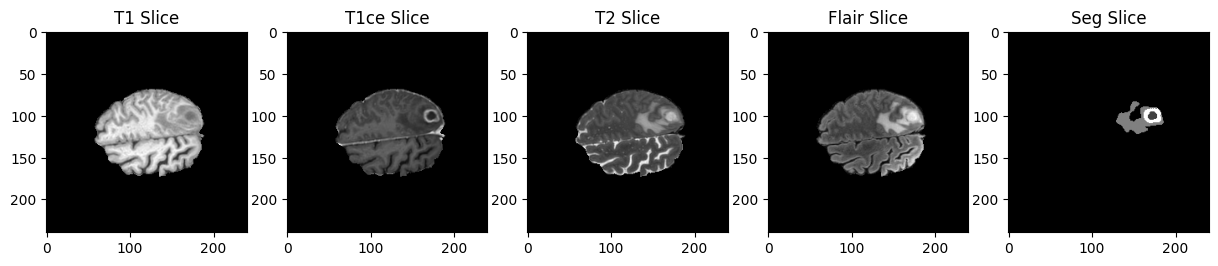

In [13]:
# Converting each loaded image into a NumPy array.
numpy_data_1 = img_t1.get_fdata()
numpy_data_2 = img_t1ce.get_fdata()
numpy_data_3 = img_t2.get_fdata()
numpy_data_4 = img_flair.get_fdata()
numpy_data_5 = img_seg.get_fdata()

#Printing the shape of each array to verify its dimensions.
print (numpy_data_1.shape)
print (numpy_data_2.shape)
print (numpy_data_3.shape)
print (numpy_data_4.shape)
print (numpy_data_5.shape)

#Displaying sample slices for visualisation.
# First dataset
plt.figure(figsize =[15,5])
slice_index1 = numpy_data_1.shape[0] // 2
image_slice1 = numpy_data_1[:,:,slice_index1]
plt.subplot(1,5,1)
plt.imshow(image_slice1, cmap='gray')
plt.title('T1 Slice')

# Second dataset
slice_index2 = numpy_data_2.shape[0] // 2
image_slice2 = numpy_data_2[:,:,slice_index2]
plt.subplot(1,5,2)
plt.imshow(image_slice2, cmap='gray')
plt.title('T1ce Slice')

# Third dataset
slice_index3 = numpy_data_3.shape[0] // 2
image_slice3 = numpy_data_3[:,:,slice_index3]
plt.subplot(1,5,3)
plt.imshow(image_slice3, cmap='gray')
plt.title('T2 Slice')

# Fourth dataset
slice_index4 = numpy_data_4.shape[0] // 2
image_slice4 = numpy_data_4[:,:,slice_index4]
plt.subplot(1,5,4)
plt.imshow(image_slice4, cmap='gray')
plt.title('Flair Slice')

# Fifth dataset
slice_index5 = numpy_data_5.shape[0] // 2
image_slice5 = numpy_data_5[:,:,slice_index5]
plt.subplot(1,5,5)
plt.imshow(image_slice5, cmap='gray')
plt.title('Seg Slice')

# Display all figures
#plt.show()

## Visualize the slices

In [17]:
img_t1_array = img_t1.get_fdata()
img_t1ce_array = img_t1ce.get_fdata()
img_t2_array = img_t2.get_fdata()
img_flair_array = img_flair.get_fdata()
img_seg_array = img_seg.get_fdata()

print(img_t1_array)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [15]:
np.set_printoptions(suppress=True, precision=3)
A = img_t1.affine
print(A)

[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


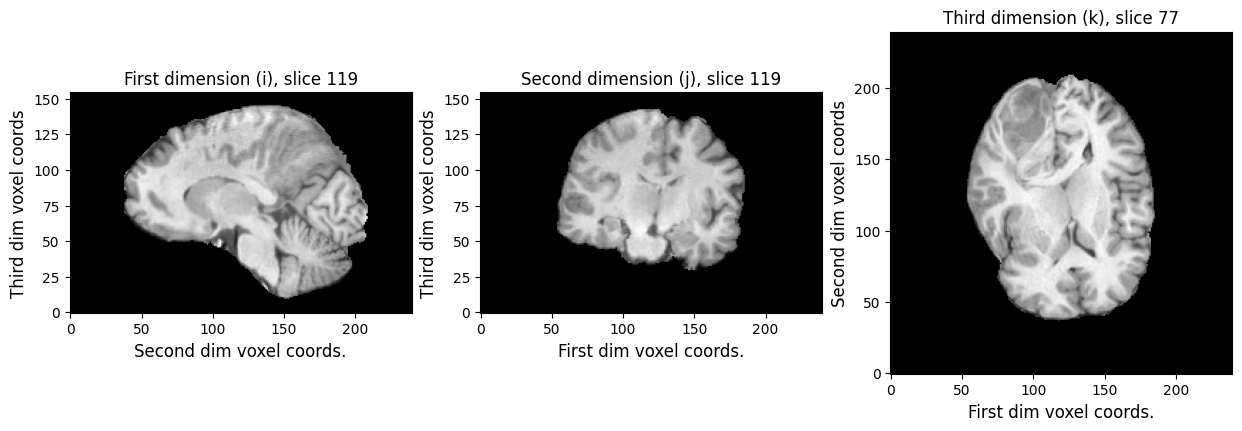

In [14]:
n_i, n_j, n_k = img_t1_array.shape
i = (n_i - 1) // 2
j = (n_j - 1) // 2
k = (n_k - 1) // 2

# the center voxel slice, as calculated in the previous cell
def make_slices(img_data):
    n_i, n_j, n_k = img_t1_array.shape
    i = (n_i - 1) // 2  # // for integer division
    j = (n_j - 1) // 2
    k = (n_k - 1) // 2
    slice_0 = img_data[i, :, :]
    slice_1 = img_data[:, j, :]
    slice_2 = img_data[:, :, k]
    return [slice_0, slice_1, slice_2]


def show_slices(slices):

    fig, axes = plt.subplots(1, len(slices), figsize=(15,15))
    for idx, slice in enumerate(slices):
        axes[idx].imshow(slice.T, cmap="gray", origin="lower")

    axes[0].set_xlabel('Second dim voxel coords.', fontsize=12)
    axes[0].set_ylabel('Third dim voxel coords', fontsize=12)
    axes[0].set_title('First dimension (i), slice {}'.format(i))

    axes[1].set_xlabel('First dim voxel coords.', fontsize=12)
    axes[1].set_ylabel('Third dim voxel coords', fontsize=12)
    axes[1].set_title('Second dimension (j), slice {}'.format(j))

    axes[2].set_xlabel('First dim voxel coords.', fontsize=12)
    axes[2].set_ylabel('Second dim voxel coords', fontsize=12)
    axes[2].set_title('Third dimension (k), slice {}'.format(k))

# display slices calling our function
show_slices(make_slices(img_t1_array))

In [18]:
import torch
import torchio as tio
import seaborn as sns
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from monai.transforms import ScaleIntensity, NormalizeIntensity, LoadImage

import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap_external>:1301: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.


In [19]:
from monai.transforms import LoadImage

loader = LoadImage(image_only=False)

class MRI_Dataset(Dataset):
    def __init__(self, data_dir, transforms=None, mode='train'):
        self.data_dir = data_dir
        self.patient_dirs = next(os.walk(data_dir))[1]
        self.transforms = transforms
        self.mode = mode

    def __len__(self):
        return len(self.patient_dirs)

    def __getitem__(self, idx):
        data_id = self.patient_dirs[idx]
        patient_dir = os.path.join(self.data_dir, data_id)


        modalities = {}
        for modality in ['t1', 't1ce', 't2', 'flair']:
            file_path = os.path.join(patient_dir, f'{data_id}_{modality}.nii.gz')
            img, meta_data = loader(file_path)
            modalities[modality] = (img, meta_data)

        ref_affine = modalities['flair'][1]['affine']

        seg_tensor = None
        if self.mode == 'train':
            seg_file = os.path.join(patient_dir, f"{data_id}_seg.nii.gz")
            seg_img, _ = loader(seg_file)

            # Safely remap BraTS21 labels [1, 2, 4] -> [0, 1, 2]
            # Proper BraTS label remapping
            seg_img_remap = np.zeros_like(seg_img, dtype=np.uint8)
            seg_img_remap[seg_img == 1] = 0  # NCR/NET → class 0
            seg_img_remap[seg_img == 2] = 1  # ED → class 1
            seg_img_remap[seg_img == 4] = 2  # ET → class 2

            seg_tensor = torch.from_numpy(seg_img_remap).unsqueeze(0)
            seg_image = tio.LabelMap(tensor=seg_tensor, affine=ref_affine)
        else:
            seg_image = None

        vol = np.stack([modalities['flair'][0], modalities['t1'][0], modalities['t1ce'][0], modalities['t2'][0]], axis=0)
        vol_tensor = torch.from_numpy(vol.astype(np.float32))

        image = tio.ScalarImage(tensor=vol_tensor, affine=ref_affine)

        subject = tio.Subject(image=image, seg=seg_image if seg_image is not None else None)

        subject = tio.Compose([
            tio.ToCanonical(),
            tio.Resample((1, 1, 1)),
        ])(subject)

        if self.transforms:
            subject = self.transforms(subject)

        return {
            'image': subject['image'].data,
            'seg': subject['seg'].data if 'seg' in subject else None,
        }

In [20]:
train_transforms = tio.Compose([
    tio.RandomFlip(axes=0),
    tio.RandomFlip(axes=1),
    tio.RandomAffine(),
    tio.RandomElasticDeformation(),

    # Only apply to image
    tio.RandomNoise(p=0.2, include=['image']),
    tio.RandomBlur(p=0.3, include=['image']),
    tio.ZNormalization(include=['image']),

    # Apply to both
    tio.CropOrPad((160, 160, 96)),
])

test_transforms = tio.Compose([
    tio.ZNormalization(include=['image']),
    tio.CropOrPad((160, 160, 96)),
])

In [21]:
dataset = MRI_Dataset(output_dir, transforms=train_transforms, mode='train')

print(len(dataset))

1251


In [22]:
sample = dataset[1]
print("Image shape:", sample['image'].shape)  # Expected: (4, H, W, D)
if sample['seg'] is not None:
    print("Segmentation shape:", sample['seg'].shape)

Image shape: torch.Size([4, 160, 160, 96])
Segmentation shape: torch.Size([1, 160, 160, 96])


In [23]:
full_dataset = MRI_Dataset(data_dir=output_dir, transforms=None, mode='train')

from torch.utils.data import random_split

train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_split, val_split, test_split = random_split(full_dataset, [train_size, val_size, test_size])

# Wrapper to apply different transforms to splits
class TransformWrapper(Dataset):
    def __init__(self, dataset, transforms):
        self.dataset = dataset
        self.transforms = transforms

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        subject = tio.Subject(
            image=tio.ScalarImage(tensor=sample['image']),
            seg=tio.LabelMap(tensor=sample['seg']) if sample['seg'] is not None else None
        )
        subject = self.transforms(subject)
        return {
            'image': subject['image'].data,
            'seg': subject['seg'].data if 'seg' in subject else None,
        }

In [24]:
train_dataset = TransformWrapper(train_split, train_transforms)
val_dataset = TransformWrapper(val_split, test_transforms)
test_dataset = TransformWrapper(test_split, test_transforms)

train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=3, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=3, shuffle=False)

# Defining the SwinUNetr

In [25]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

In [26]:
from monai.networks.nets import UNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet(
    spatial_dims=3,
    in_channels=4,
    out_channels=3,  # Fix here
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm='instance',
).to(device)

# Optional safety check
print(f"Model output channels: {model.out_channels}")

Model output channels: 3


In [27]:
from monai.losses import DiceCELoss
from monai.metrics import DiceMetric

loss_function = DiceCELoss(to_onehot_y=True, softmax=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
dice_metric = DiceMetric(include_background=False, reduction="mean")

## Training and Validation

In [ ]:
from tqdm import tqdm
from monai.metrics import DiceMetric, HausdorffDistanceMetric, SurfaceDistanceMetric
from monai.networks.utils import one_hot

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Initialize metrics
dice_metric = DiceMetric(include_background=False, reduction="mean")

# Move model to device immediately after definition or loading
model = model.to(device)

epochs = 1

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch in tqdm(train_loader):
        images = batch['image'].to(device)  # [B, C, D, H, W]
        labels = batch['seg'].to(device).long()  # [B, 1, D, H, W]

        optimizer.zero_grad()
        outputs = model(images)  # [B, C, D, H, W]
        loss = loss_function(outputs, labels)  # Safe, MONAI will internally one-hot from [B, 1, D, H, W] to [B, C, D, H, W]
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1} average loss: {epoch_loss / len(train_loader):.4f}")

    # --- Validation ---
    model.eval()
    dice_metric.reset()

    with torch.no_grad():
        for batch in val_loader:
            images = batch['image'].to(device)
            labels = batch['seg'].to(device).long()  # Should be [B, 1, D, H, W]

            outputs = model(images)

            # Ensure same size (safe crop to min size in all dims)
            min_d = min(outputs.shape[2], labels.shape[2])
            min_h = min(outputs.shape[3], labels.shape[3])
            min_w = min(outputs.shape[4], labels.shape[4])

            outputs = outputs[:, :, :min_d, :min_h, :min_w]
            labels = labels[:, :, :min_d, :min_h, :min_w]

            # Safe one-hot
            labels_one_hot = one_hot(labels, num_classes=outputs.shape[1])

            dice_metric(y_pred=outputs, y=labels_one_hot)
    # Aggregate and print metrics
    dice_score = dice_metric.aggregate().item()

    print(f"Epoch {epoch+1} validation Dice: {dice_score:.4f}")

  0%|          | 0/292 [00:00<?, ?it/s]

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_sample(image, ground_truth, prediction, slice_index=None):
    """
    Visualize input image, ground truth, and prediction on the same slice.
    Assumes image shape: (C, H, W, D), labels: (H, W, D)
    """
    # Pick a central slice if not specified
    if slice_index is None:
        slice_index = image.shape[-1] // 2

    # Choose FLAIR as visualization channel (commonly used)
    flair_slice = image[0, :, :, slice_index].cpu().numpy()

    # Convert ground truth and prediction to numpy
    gt_slice = ground_truth[:, :, slice_index].cpu().numpy()
    pred_slice = torch.argmax(prediction, dim=1)[0, :, :, slice_index].cpu().numpy()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(flair_slice, cmap='gray')
    axs[0].set_title('FLAIR Input')

    axs[1].imshow(gt_slice, cmap='jet', alpha=0.6)
    axs[1].set_title('Ground Truth Segmentation')

    axs[2].imshow(pred_slice, cmap='jet', alpha=0.6)
    axs[2].set_title('Predicted Segmentation')

    plt.show()

# --- After validation, visualize 3 samples ---
print("\n--- Visualizing Validation Samples ---")
model.eval()
with torch.no_grad():
    count = 0
    for batch in test_loader:
        images = batch['image'].to(device)
        labels = batch['seg'].to(device).squeeze(1)

        outputs = model(images)

        visualize_sample(images[0], labels[0], outputs)

        count += 1
        if count >= 3:
            break